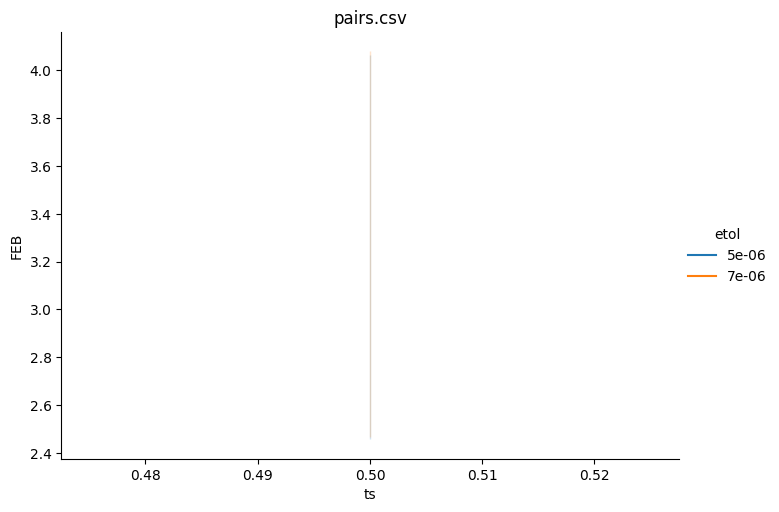

In [21]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas
import seaborn as sns

#seaborn.set(style='ticks')


base="/home/agoga/documents/code/topcon-md/output/NEB/smallersample/"
fileList=["125-133.csv","125-124.csv","125-134.csv","125-339.csv","125-126.csv","125-344.csv"]

base="/home/agoga/documents/code/topcon-md/output/NEB/sixloc/"
fileList=["3924-1547.csv","3924-3632.csv","3924-1545.csv","3924-3599.csv","3924-1548.csv","3924-3955.csv"]

base="/home/agoga/documents/code/topcon-md/output/NEB/preciseconvergence"
fileList=["3924-1547.csv"]

base="/home/agoga/documents/code/topcon-md/output/NEB/"#highHconv-testing/"
fileList=["pairs.csv"]

#mirror pairs
#133 126
#344 134
#339 124

for f in fileList:
    d=base+f
    data = pandas.read_csv(d)
    #data = pandas.read_csv("/home/agoga/documents/code/topcon-md/output/NEB/fixed/4090.csv")
    #data = pandas.read_csv("/home/agoga/documents/code/topcon-md/output/NEB/varyTSmin/125.csv")



    # data=data[data.etol<3e-5]
    # data=data[data.etol>=5e-6]
    # data=data[data.ts<=0.7]
    # data=data[data.ts>=0.4]
    # data = data[data.FEB > 0.05]
    data = data[data.FEB < 5]

    # data=data[data.etol <3e-5]
    # data=data[data.etol >3e-6]

    #sns.relplot(data=data,x="ts",y="A",hue="etol", kind="line",aspect=1.4,palette='tab10')#sns.color_palette("Set2"))
    sns.relplot(data=data,x="ts",y="FEB",hue="etol", kind="line",aspect=1.4,palette='tab10')#sns.color_palette("Set2"))

    #plt.hlines(y=3.2,color='r',xmin=0.3,xmax=2,linestyles='-.')
    # plt.ylim(top=3.6)
    plt.title(f)


['SiOxNEB-H.csv']
debug - 104-1154
debug - 200-939
debug - 366-1231
debug - 1592-2889
debug - 1796-2630
debug - 2058-2954
debug - 3487-4222
debug - 3768-5683
debug - 4823-5662
815
826
0


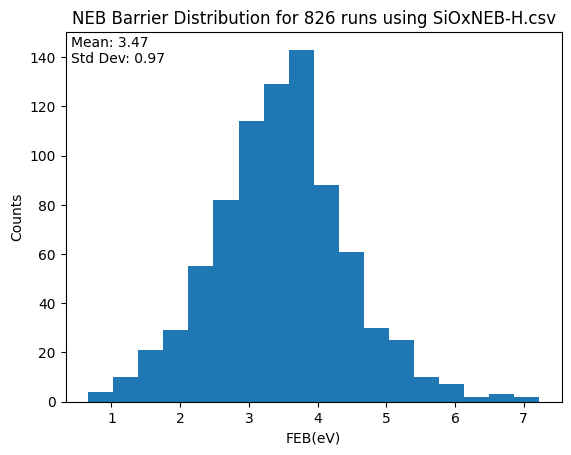

In [29]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas
import numpy as np
import statistics
import os
import glob


base="/home/agoga/documents/code/topcon-md/output/NEB/H6per-pairs/"#noHpairs/"

os.chdir(base)
d = glob.glob('*.{}'.format('csv'))
csvfile=d[0]
print(d)
data = pandas.read_csv(csvfile)


dist=[]
done=[]
bad=[]#["78-90","78-89","168-178","171-899","258-270","258-363","265-270"]

#H 3%
#hclose=[363, 697, 1101, 1342, 1906, 2561, 3166, 3347, 3560, 3791]
#H 6%
hclose=[106, 210, 232, 348, 597, 689, 880, 1879, 2214, 3155, 3218, 3345, 3867, 4738, 5505, 5549, 5950, 6111] 
total=0
skip=0
for index,row in data.iterrows():

    sum=0
    over=0
    pair = row['pair']
    hkill=False
    for hc in hclose:
        if str(hc) in pair:
            hkill=True
    if hkill==True:
        continue
    
    if pair not in done and pair not in bad:
        for i,r in data[data.pair==pair].iterrows():
            if r['dist'] < 3.6:
                feb = r['A']
                if feb<1.1:
                    print(f"debug - {pair}")
                if feb < 8 and feb > 0.5:
                    sum += feb
                    over+=1

        if over >0:
            avg = sum/over
            dist.append(avg)
        done.append(pair)
        total+=1
    else:
        skip+=1
        
        
print(len(dist))
#counts,bins=np.histogram(dist)
print(total)
print(skip)

mean=statistics.mean(dist)
stddev=statistics.stdev(dist)
mstxt=f"Mean: {round(mean,2)}\nStd Dev: {round(stddev,2)}"

f,ax = plt.subplots()
plt.title(f'NEB Barrier Distribution for {total} runs using {csvfile}')
plt.xlabel('FEB(eV)')
plt.ylabel('Counts')
plt.hist(dist,18)

plt.text(0.01,0.99,mstxt,ha='left',va='top', transform=ax.transAxes, fontsize = 10)
plt.show()